## Исследование закономерностей определяющих успешность игр

Интернет-магазин «Стримчик», продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
В сете собраны данные до 2016 года(данные за 2016 год могут быть неполными). Представим, что сейчас декабрь 2016 г., и нужно запланировать кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.


## Общая информация

Загружу библиотеки

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pathlib
from pathlib import Path

Ознакомлюсь с несколькими строками таблицы

In [ ]:
data.sample(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
5494,Cabela's Dangerous Hunts 2011,PS3,2010.0,Sports,0.26,0.04,0.00,0.03,60.0,5.4,T
2976,NCAA Football 2005,XB,2004.0,Sports,0.63,0.02,0.00,0.03,89.0,8,E
367,LEGO Star Wars: The Video Game,PS2,2005.0,Action,1.98,1.14,0.01,0.41,NaN,NaN,NaN
831,Toy Story 3: The Video Game,DS,2010.0,Action,0.89,0.94,0.02,0.21,NaN,NaN,NaN
11662,The Idolm@ster,X360,2007.0,Simulation,0.00,0.00,0.08,0.00,NaN,NaN,NaN
11,Mario Kart DS,DS,2005.0,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E
3474,Fire Emblem: Seisen no Keifu,SNES,1996.0,Strategy,0.00,0.00,0.58,0.00,NaN,NaN,NaN
14487,Winning Post 7 2009,PSP,2009.0,Sports,0.00,0.00,0.03,0.00,NaN,NaN,NaN
12195,Sherlock Holmes: Crimes & Punishments,PS3,2014.0,Adventure,0.03,0.03,0.00,0.01,NaN,NaN,NaN
10282,Robotech: Invasion,PS2,2004.0,Shooter,0.05,0.04,0.00,0.01,57.0,tbd,T


Описание данных

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
pd.set_option('float_format', '{:.2f}'.format)

Выведу статистику

In [ ]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


В сет попали данные с 1980 года. Есть предположение, что игры тех лет уже не актуальны.

Статичтика по нечисловым признакам

In [ ]:
data.describe(include=['object'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


Выведу уникальные значения для платформ, жанров и рейтингов ESRB

In [ ]:
data.Platform.value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [ ]:
data.Genre.value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [ ]:
data.Rating.value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

Вывод. В сете есть пропущенные значения, значения, которые редко встречаются, а также значение с которым стоит разобраться - 'tbd'. Стоит более пристально проверить актуальность игр с очень ранними релизами, т.к. у каждого продукта есть свой жизненный цикл, возможно они на стадии спада, а значит не нуждаются в инвестициях в маркетинг. Для удобства названия столбцов лучше привести к нижнему регистру.

## Подготовка данных

Приведу названия столбцов к нижнему регистру

In [ ]:
data.rename(columns = {'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 'Genre':'genre', 'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales', 'Other_sales':'other_sales', 'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating' }, inplace = True)


In [ ]:
# другой вариант  data.columns=data.columns.str.lower()

In [ ]:
print('Число дубликатов:', data.duplicated().sum())

Число дубликатов: 0


Проверю наличие явных дубликатов

Изучу сет на неявные дубли

Уникальные значения среди названий игр

In [ ]:
data['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

Названий игр очень много, что бы пытаться их все просмотреть на неявные дубли. Но интересно посмотреть есть ли игры, которые представлены на разных платформах. Возьму одну из рейтинговых межплатформенных игр и проверю.

In [ ]:
display(data.loc[(data['name'] == 'Gauntlet: Seven Sorrows')])


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4779,Gauntlet: Seven Sorrows,PS2,2005.00,Role-Playing,0.20,0.15,0.00,0.05,59.00,5.7,T
8028,Gauntlet: Seven Sorrows,XB,2005.00,Role-Playing,0.14,0.04,0.00,0.01,61.00,7.8,T


В Интернет-магазин «Стримчик» предствлены межплатформенные игры, которые в зависимости от платформы имеют разные рейтинги. Эта информация может помочь маркетологам делать более персонифицированную рекламу.

In [ ]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

среди платформ дублей нет

In [ ]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

 среди жанров дублей нет

In [ ]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

«K-A» («Kids to Adults»)— «Для детей и взрослых»: Содержание игры вполне подходит для возрастной категории от 6 лет и старше. Такие игры подходят для всех возрастов.   Они могут содержать минимальное насилие или немного грубый разговорный язык. Этот рейтинг был заменён на «E» («Everyone») 1 января 1998 года и может встречаться только в играх, изданных ранее,  кроме The Simpsons Cartoon Studio. Первой игрой, получившей данный рейтинг, стала SimCity 2000 в 1993 году.

Данная информация может понадобиться, если потребуется удалить игры выпущенные ранее 1998 года, в которых не указан год выпуска. Иначе можно заменить «K-A» на «E».

In [ ]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

годы выпуска не дублируются, например, сокращенной записью '98

In [ ]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В оценке пользователей встречается 'tbd', что означает "To Be Determined" ("Будет определено"), т.к. в сете уже есть тип без оценки NaN, то можно 'tbd' заменить на NaN для удобства работы с данными. (Для прогонозов нужен рейтинг, если его нет, прогоноз не построить, поэтому причина - пропуск или еще не оценили в данный момент времени не так важны.)

In [ ]:
data['user_score'].replace('tbd', np.nan, inplace=True)

Изучу типы данных

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Часть даных стоит перевести в Integer64 и Float32

Год выпуска хорошо бы перевести в Datetime64

In [ ]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['year_of_release'].dtypes

Int64Dtype()

Пока получилось перевести в Int64. Возможно Datetime64 не понадобится.

Float64  замененю на Float32 для экономии памяти.

In [ ]:
data['na_sales'] = data['na_sales'].astype('Float32')
data['na_sales'].dtypes

Float32Dtype()

In [ ]:
data['eu_sales'] = data['eu_sales'].astype('Float32')
data['eu_sales'].dtypes

Float32Dtype()

In [ ]:
data['jp_sales'] = data['jp_sales'].astype('Float32')
data['jp_sales'].dtypes

Float32Dtype()

In [ ]:
data['other_sales'] = data['other_sales'].astype('Float32')
data['other_sales'].dtypes

Float32Dtype()

В оценке пользователей сменю тип Object на Float

In [ ]:
data['user_score'] = data['user_score'].astype('float')
data['user_score'].dtypes

dtype('float64')

Выведу строки с пропущенными значениями

In [ ]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Две строки не содержат название игры и две строки - жанр, без этой информации анализ по этим играм бессмысленый, удалю

In [ ]:
data = data.dropna(subset=['name'])

In [ ]:
data = data.dropna(subset=['genre'])

Небольшое количество строк(269) строк не содержат годов выпуска, данная информация нужна для построения распределений по годам, удалаю, т.к. заменить нечем

In [ ]:
data = data.dropna(subset=['year_of_release'])

In [ ]:
data["rating"].fillna("Unknown", inplace = True)

Суммарные продажи во всех регионах вынесу в отдельный столбец

In [ ]:
data['total_sales'] = \
      data['na_sales']\
    + data['eu_sales']\
    + data['jp_sales']\
    + data['other_sales']

In [ ]:
data.sample(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
5872,Hard Hitter Tennis,PS2,2001,Sports,0.15,0.11,0.00,0.04,NaN,NaN,E,0.30
3266,Wall-E,X360,2008,Platform,0.29,0.26,0.00,0.07,50.00,6.30,E,0.62


## Исследовательский анализ данных

Изучу сколько игр выпускалось в разные годы

In [ ]:
data.pivot_table(index=['year_of_release'], values='name', aggfunc=['count'])

,count
,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16


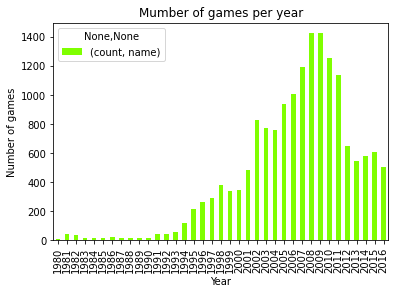

In [ ]:
data.pivot_table(index=['year_of_release'], values='name', aggfunc=['count']).plot(kind='bar', color='chartreuse')
plt.xlabel('Year')
plt.ylabel('Number of games')
plt.title('Mumber of games per year');

Самый пик релизов приходится на 2006-2011 годы, далее достижение плато на уровне 500-600 релизов игр в год.

Выведу продажи по платформам

In [ ]:
data.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc=['sum', 'count']).sort_values(by=['platform','year_of_release'] , ascending=False).head(60)

sum       count
                         total_sales total_sales
platform year_of_release                        
XOne     2016                  26.15          87
         2015                  60.14          80
         2014                  54.07          61
         2013                  18.96          19
XB       2008                   0.18           1
         2007                   0.55           3
         2006                  10.04          62
         2005                  49.08         179
         2004                  65.42         177
         2003                  55.04         189
         2002                  48.01         158
         2001                  22.26          33
         2000                   0.99           1
X360     2016                   1.52          13
         2015                  11.96          35
         2014                  34.74          63
         2013                  88.58          75
         2012                  99.74         106
         2011                 143.84         206
         2010                 170.03         182
         2009                 120.29         172
         2008                 135.26         146
         2007                  95.41         123
         2006                  51.62          93
         2005                   8.25          18
WiiU     2016                   4.60          14
         2015                  16.35          28
         2014                  22.03          31
         2013                  21.65          42
         2012                  17.56          32
Wii      2016                   0.18           1
         2015                   1.14           4
         2014                   3.75           6
         2013                   8.59          12
         2012                  21.71          31
         2011                  59.65         143
         2010                 127.95         253
         2009                 206.97         325
         2008                 171.32         282
         2007                 152.77         185
         2006                 137.15          44
WS       2001                   0.28           2
         2000                   0.68           2
         1999                   0.46           2
TG16     1995                   0.16           2
SNES     1999                   0.26           1
         1998                   0.22           2
         1997                   0.99           4
         1996                  15.92          30
         1995                  32.20          54
         1994                  35.08          53
         1993                  40.02          46
         1992                  32.98          21
         1991                  16.22          24
         1990                  26.15           4
SCD      1994                   0.36           5
         1993                   1.50           1
SAT      1999                   0.09           1
         1998                   3.82          29
         1997                   6.77          34

Сформирую сводную по годам

In [ ]:
data.pivot_table(index=['year_of_release','platform'], values='total_sales', aggfunc=['sum','count']).sort_values(by=['year_of_release', 'platform'] , ascending=False).head(60)

sum       count
                         total_sales total_sales
year_of_release platform                        
2016            XOne           26.15          87
                X360            1.52          13
                WiiU            4.60          14
                Wii             0.18           1
                PSV             4.25          85
                PS4            69.25         164
                PS3             3.60          38
                PC              5.25          54
                3DS            15.14          46
2015            XOne           60.14          80
                X360           11.96          35
                WiiU           16.35          28
                Wii             1.14           4
                PSV             6.25         110
                PSP             0.12           3
                PS4           118.90         137
                PS3            16.82          73
                PC              8.52          50
                3DS            27.78          86
2014            XOne           54.07          61
                X360           34.74          63
                WiiU           22.03          31
                Wii             3.75           6
                PSV            11.90         100
                PSP             0.24          10
                PS4           100.00          75
                PS3            47.76         108
                PC             13.28          47
                3DS            43.76          80
2013            XOne           18.96          19
                X360           88.58          75
                WiiU           21.65          42
                Wii             8.59          12
                PSV            10.59          63
                PSP             3.14          54
                PS4            25.99          16
                PS3           113.25         126
                PC             12.38          38
                DS              1.54           8
                3DS            56.57          91
2012            X360           99.74         106
                WiiU           17.56          32
                Wii            21.71          31
                PSV            16.19          53
                PSP             7.69         106
                PS3           107.36         148
                PC             23.22          61
                DS             11.01          23
                3DS            51.36          93
2011            X360          143.84         206
                Wii            59.65         143
                PSV             4.63          18
                PSP            17.82         139
                PS3           156.78         215
                PS2             0.45           7
                PC             35.03         139
                DS             26.18         153
                3DS            63.20         116
2010            X360          170.03         182
                Wii           127.95         253

Посторю график

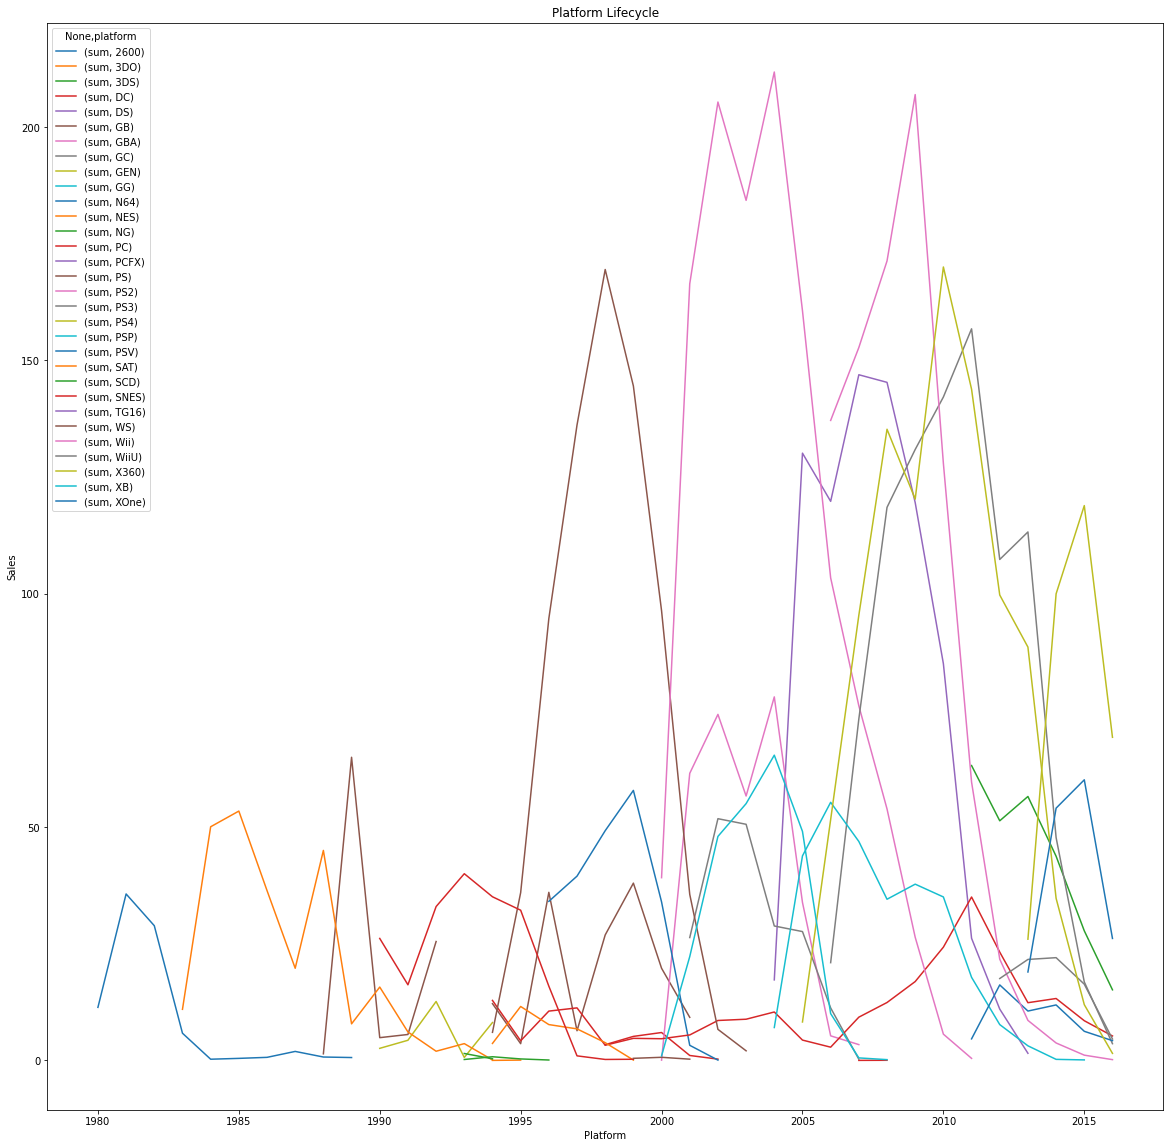

In [ ]:
data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=['sum']).plot(figsize=(20,20))
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.title('Platform Lifecycle');

По графику видно, что у большинства платформ есть жизненнй цикл - около 5-10 лет, из них порядка 2,5-5 лет на рост, столько же на падение продаж. Только PC хоть и не показывает высоких продаж, но его цикл самый долгий из тех, кто остался на рынке вплоть до 2016 года.

Построю график за последние 10 лет

In [ ]:
more_2007 = data.query('year_of_release >=2007')

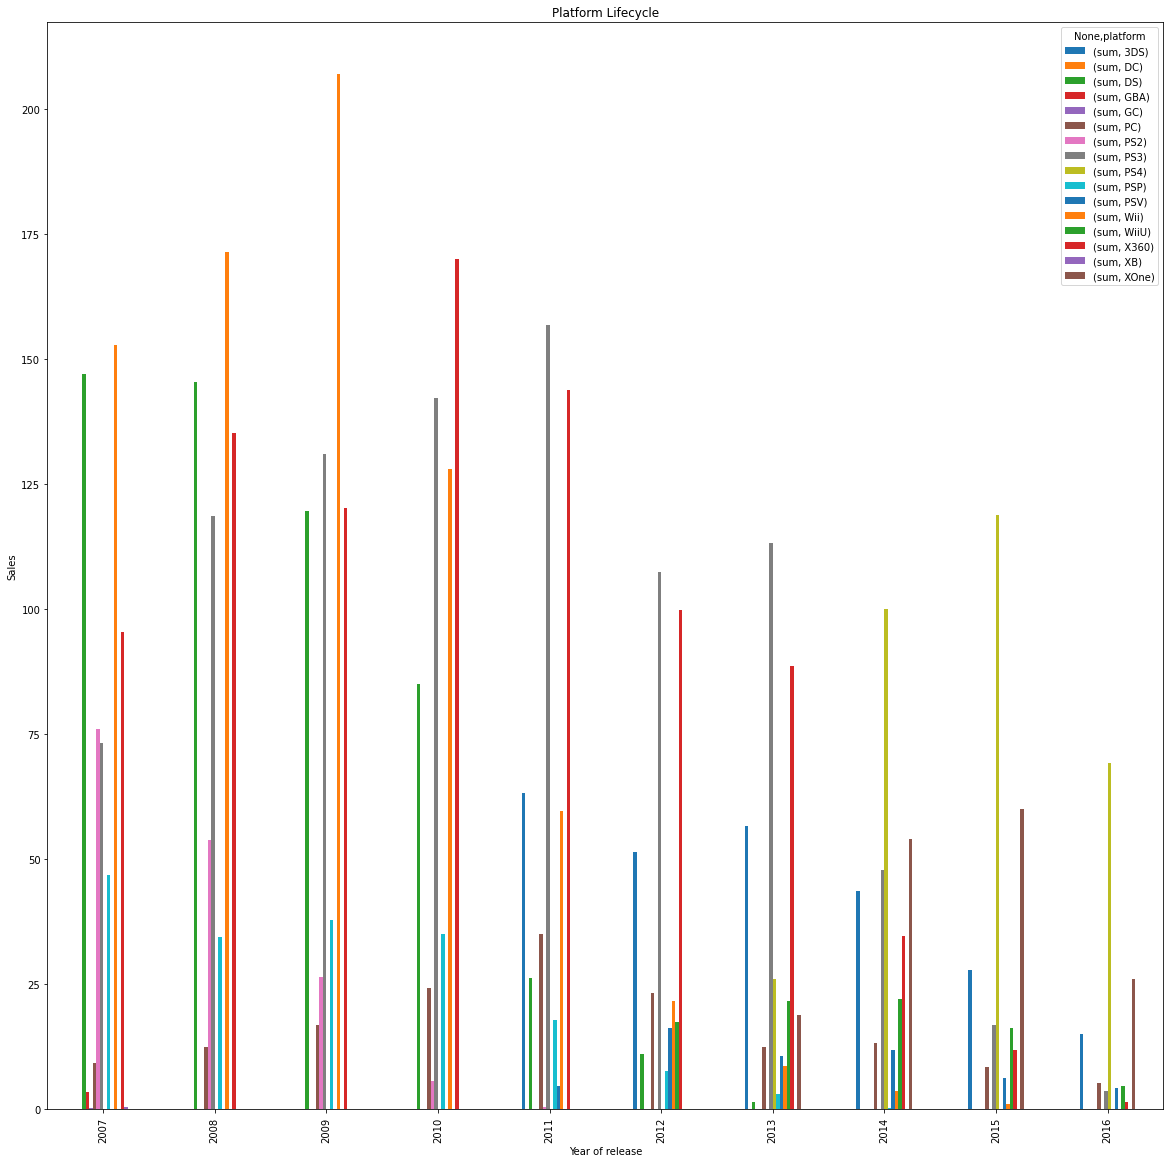

In [ ]:
more_2007.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=['sum']).plot(kind='bar', figsize=(20,20))
plt.xlabel('Year of release')
plt.ylabel('Sales')
plt.title('Platform Lifecycle');

In [ ]:
more_2007.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=['sum'])

sum                                                     \
platform          3DS    DC     DS   GBA    GC    PC   PS2    PS3    PS4   
year_of_release                                                            
2007             <NA>  0.02 146.94  3.40  0.27  9.28 75.99  73.19   <NA>   
2008             <NA>  0.04 145.31  <NA>  <NA> 12.42 53.90 118.52   <NA>   
2009             <NA>  <NA> 119.54  <NA>  <NA> 16.91 26.40 130.93   <NA>   
2010             <NA>  <NA>  85.02  <NA>  <NA> 24.28  5.64 142.17   <NA>   
2011            63.20  <NA>  26.18  <NA>  <NA> 35.03  0.45 156.78   <NA>   
2012            51.36  <NA>  11.01  <NA>  <NA> 23.22  <NA> 107.36   <NA>   
2013            56.57  <NA>   1.54  <NA>  <NA> 12.38  <NA> 113.25  25.99   
2014            43.76  <NA>   <NA>  <NA>  <NA> 13.28  <NA>  47.76 100.00   
2015            27.78  <NA>   <NA>  <NA>  <NA>  8.52  <NA>  16.82 118.90   
2016            15.14  <NA>   <NA>  <NA>  <NA>  5.25  <NA>   3.60  69.25   

                                                             
platform          PSP   PSV    Wii  WiiU   X360    XB  XOne  
year_of_release                                              
2007            46.93  <NA> 152.77  <NA>  95.41  0.55  <NA>  
2008            34.55  <NA> 171.32  <NA> 135.26  0.18  <NA>  
2009            37.78  <NA> 206.97  <NA> 120.29  <NA>  <NA>  
2010            35.04  <NA> 127.95  <NA> 170.03  <NA>  <NA>  
2011            17.82  4.63  59.65  <NA> 143.84  <NA>  <NA>  
2012             7.69 16.19  21.71 17.56  99.74  <NA>  <NA>  
2013             3.14 10.59   8.59 21.65  88.58  <NA> 18.96  
2014             0.24 11.90   3.75 22.03  34.74  <NA> 54.07  
2015             0.12  6.25   1.14 16.35  11.96  <NA> 60.14  
2016             <NA>  4.25   0.18  4.60   1.52  <NA> 26.15

Исходя из графиков и сводной таблицы выберу период начиная с 2014 года по 2016. В 2013 году происходит взлетает XOne, уходит DC. В 2014 заданы тренды. Потенциальные для продаж - PS4, XOne, 3DS, PC, WiiU. В условии указано, что данные в сете 'до' 2016, а не 'по'. Складывается впечатление, что всеже часть данных за 2016 попало в сет. В итоге рост продаж показывали - PS4, XOne, падение - 3DS, PC, WiiU, при этом послдение все еще сохраняли выручку на высоком уровне относительно всех остальных платформ и их не стоит списывать со счетов, к тому же в любой момент у этих платформ может появится крутая игра, которая может определит цикл платформы.

In [ ]:
more_2014 = data.query('year_of_release >=2014')

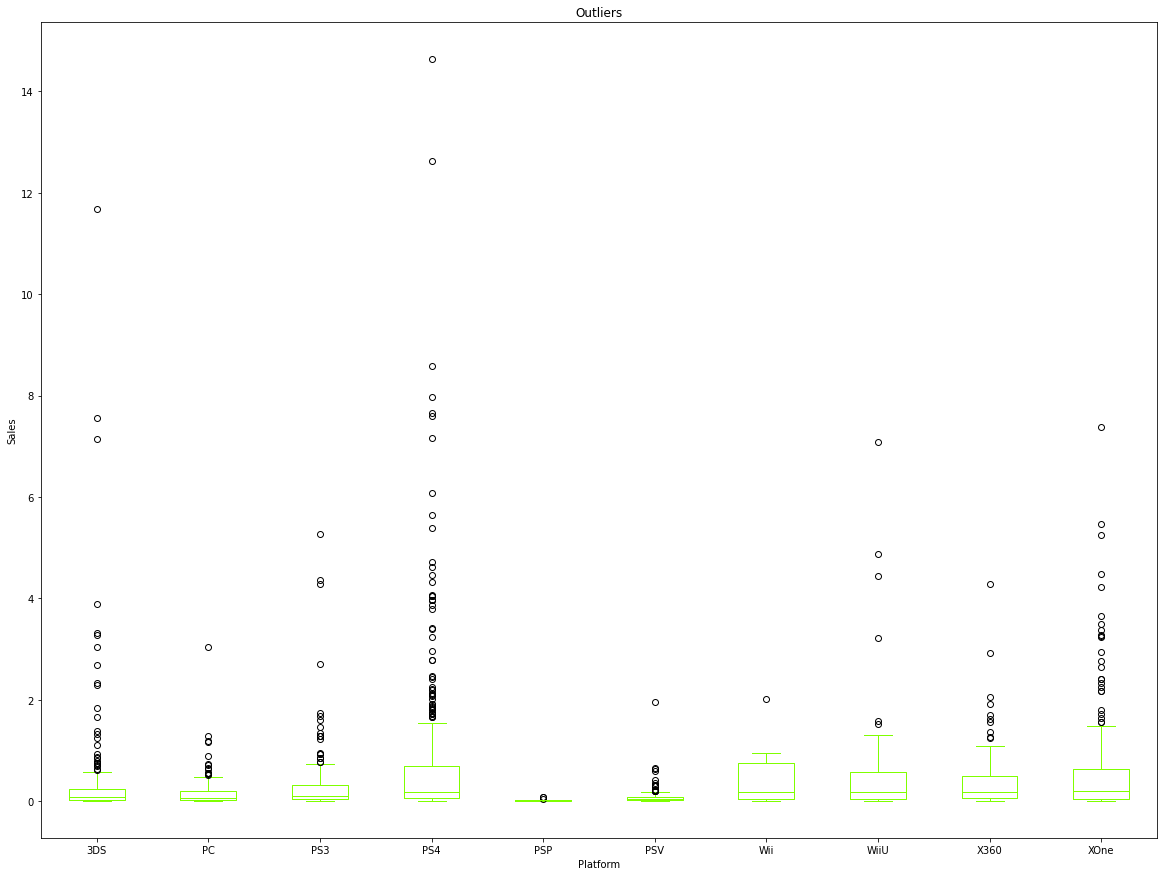

In [ ]:
more_2014.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum').plot(kind='box', figsize=(20,15), color='chartreuse')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.title('Outliers');

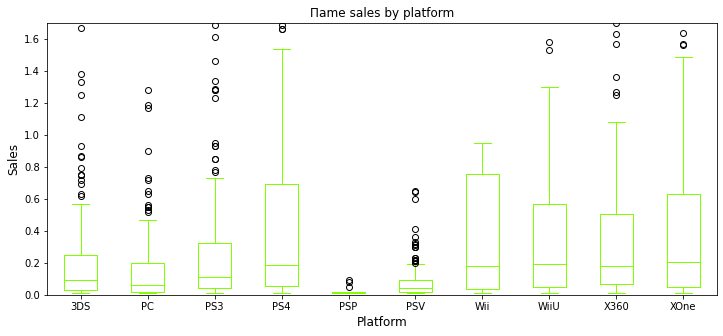

In [ ]:
more_2014.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum').plot(kind='box', figsize=(12,5), color='chartreuse')
plt.ylim(0, 1.7)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Пame sales by platform', fontsize=12);

У ряда платформ высокий уровень выбросов, который означает, что есть неольшая часть игр в портфеле платформы, которые пользуются особой популярностью. Медианы почти у всех box plot смещены.

Суммарно в топ продаж игр приходится на платформы Wii, PS4 и XOne.

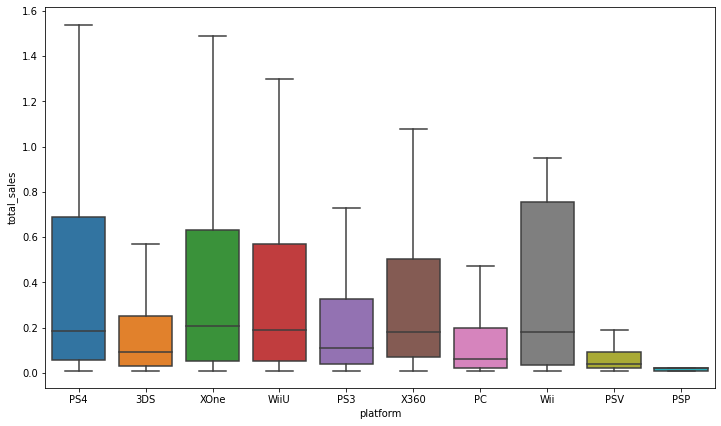

In [ ]:

plt.figure(figsize=(12, 7))
sns.boxplot(data=more_2014, x="platform", y="total_sales", showfliers=False);

Построю диаграмму рассеяния для платформы XOne

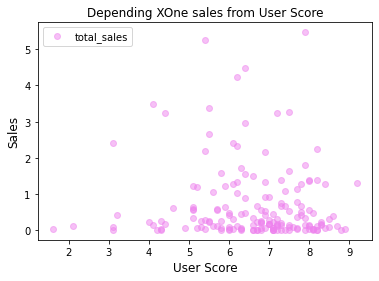

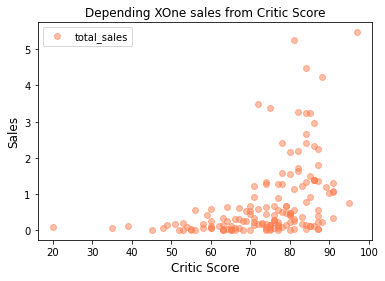

In [ ]:
more_2014[more_2014['platform']=='XOne'].plot(x='user_score', y='total_sales', style='o', alpha=0.5, color='violet')
plt.xlabel('User Score', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Depending XOne sales from User Score', fontsize=12);
more_2014[more_2014['platform']=='XOne'].plot(x='critic_score', y='total_sales', style='o', alpha=0.5, color='coral');
plt.xlabel('Critic Score', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Depending XOne sales from Critic Score', fontsize=12);

Оценка критиков в большей степени влияет на продажи, чем оценка пользователй. Нам не дано, что появляется раньше, возможно ситуация как в кино, где для критоков устраивают предпоказы и вечеринки, начинается промоушен, что и создает спрос задолго до выхода фильма, а в нашем случае игры.

Посчитаю корреляцию между отзывами и продажами

In [ ]:
corr_XOne = more_2014[more_2014['platform'] == 'XOne']

In [ ]:
corr_XOne_2014 = corr_XOne[['platform', 'total_sales', 'critic_score','user_score']]
print(corr_XOne_2014.corr())

              total_sales  critic_score  user_score
total_sales          1.00          0.43       -0.07
critic_score         0.43          1.00        0.44
user_score          -0.07          0.44        1.00


Корреляция между оценкой критиков и продажами слабая, а от оценки пользвателей продажи вообще не зависят.

Построю диаграмму рассеяния для платформы PS4

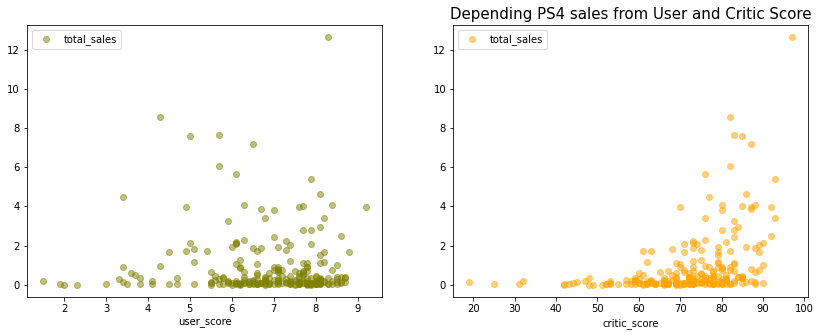

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

more_2014[more_2014['platform']=='PS4'].plot(x='user_score', y='total_sales', style='o', alpha=0.5, color='olive', ax=ax[0])
more_2014[more_2014['platform']=='PS4'].plot(x='critic_score', y='total_sales', style='o', alpha=0.5, color='orange', ax=ax[1])

plt.title('Depending PS4 sales from User and Critic Score', fontsize=15)

fig.show();

Посчитаю корреляцию между отзывами и продажами

In [ ]:
corr_PS4 = more_2014[more_2014['platform'] == 'PS4']

In [ ]:
corr_PS4_2014 = corr_PS4[['platform', 'total_sales', 'critic_score','user_score']]
print(corr_PS4_2014.corr())

              total_sales  critic_score  user_score
total_sales          1.00          0.40       -0.04
critic_score         0.40          1.00        0.55
user_score          -0.04          0.55        1.00


Также как и в случае с XOne корреляция у PS4 между оценкой критиков и продажами слабая, а от оценки пользвателей продажи вообще не зависят.

Построю диаграмму рассеяния для платформы PC

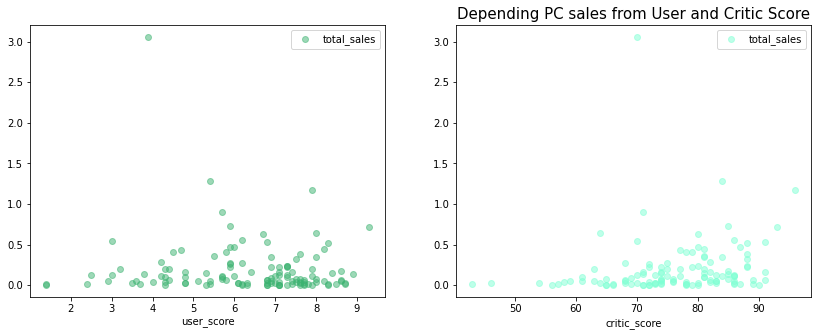

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

more_2014[more_2014['platform']=='PC'].plot(x='user_score', y='total_sales', style='o', alpha=0.5, color='mediumseagreen', ax=ax[0])
more_2014[more_2014['platform']=='PC'].plot(x='critic_score', y='total_sales', style='o', alpha=0.5, color='aquamarine', ax=ax[1])

plt.title('Depending PC sales from User and Critic Score', fontsize=15)

fig.show();

Посчитаю корреляцию между отзывами и продажами

In [ ]:
corr_PC = more_2014[more_2014['platform'] == 'PC']

In [ ]:
corr_PC_2014 = corr_PC[['platform', 'total_sales', 'critic_score','user_score']]
print(corr_PC_2014.corr())

              total_sales  critic_score  user_score
total_sales          1.00          0.17       -0.07
critic_score         0.17          1.00        0.47
user_score          -0.07          0.47        1.00


Корреляция у PC еще слабее чем у PS4 и XOne

Выведу кореляцию по всем платформам

In [ ]:
corr_more_2014 = more_2014[['platform', 'total_sales', 'critic_score','user_score']]
print(corr_more_2014.corr())

              total_sales  critic_score  user_score
total_sales          1.00          0.33       -0.01
critic_score         0.33          1.00        0.50
user_score          -0.01          0.50        1.00


Оценка критиков по всем платформам как и внутри одной популярной платформы имеют слабую корреляцию, а отзывы пользователей имеют слабую обратную корреляцию.
Вообще по графику можно сказать, что первые платформы существовали чуть дольше среднего, но не имели грандиозных взлетов. Это может быть связано с рядом факторов. Скорость прогресса, покупательская способность пользователей, наличие флагамнсокй игры, возможности у ряда компаний агрессивного маркетинга, конкурентное преимущество, например у Microsoft, и его предустановкой XBox Game Bar, up-sell/cross-sell.

Выведу общее распределение игр по жанрам

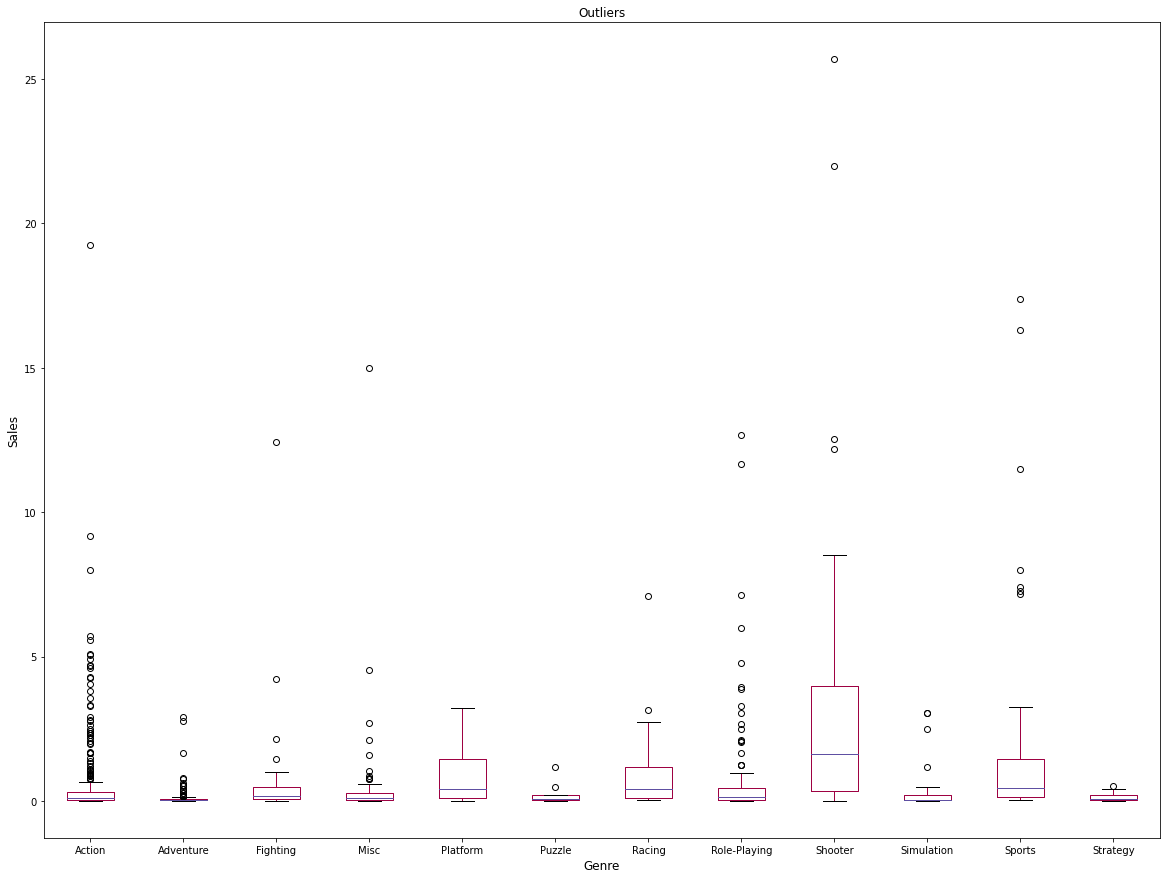

In [ ]:
more_2014.pivot_table(index='name', columns='genre', values='total_sales', aggfunc='sum').plot(kind='box', figsize=(20,15), cmap="Spectral")
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Outliers', fontsize=12);

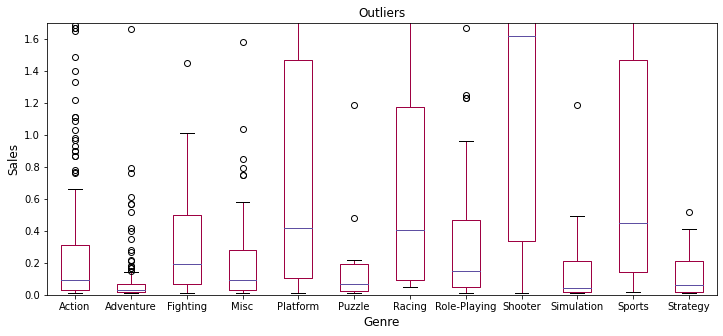

In [ ]:
more_2014.pivot_table(index='name', columns='genre', values='total_sales', aggfunc='sum').plot(kind='box', figsize=(12,5), cmap="Spectral")
plt.ylim(0, 1.7)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Outliers', fontsize=12);

Лидерами среди жанров являются Shooter, Platform и Sports.

## Портрет пользователя каждого региона

### Рынок NA (Северная Америка)

Самые популярные платформы (топ-5)

In [ ]:
more_2014.pivot_table(index='platform', values='na_sales', aggfunc={"na_sales": sum}).sort_values(by=['na_sales'], ascending=False).head(5)

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


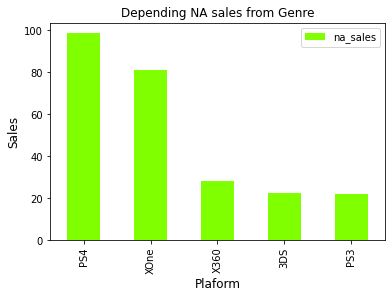

In [ ]:
more_2014.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by=['na_sales'], ascending=False).head(5).plot(kind='bar', color='chartreuse')
plt.xlabel('Plaform', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Depending NA sales from Genre', fontsize=12);

Топ-5 платформ по продажам в Северной Америке: PS4, XOne, X360, 3DS, PS3

Самые популярные жанры (топ-5)

In [ ]:
more_2014.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by=['na_sales'] , ascending=False).head(5)

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


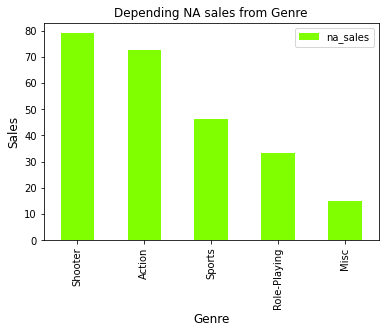

In [ ]:
more_2014.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by=['na_sales'], ascending=False).head(5).plot(kind='bar', color='chartreuse')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Depending NA sales from Genre', fontsize=12);

Топ-5 жанров по продажам в Северной Америке: Shooter, Action, Sports, Role-Playing, Misc

Влияние рейтинга ESRB на продажи

In [ ]:
more_2014.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by=['na_sales'] , ascending=False).head(5)

,na_sales
rating,
M,96.42
Unknown,64.72
E,50.74
T,38.95
E10+,33.23


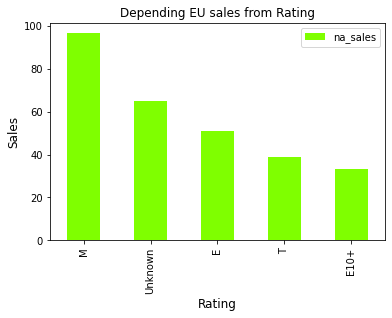

In [ ]:
more_2014.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by=['na_sales'], ascending=False).head(5).plot(kind='bar', color='chartreuse')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Depending EU sales from Rating', fontsize=12);

Самые высокие продажи игр в Северной Америке отмечены рейтингом «M» («Mature») — «От 17 лет»

Выведу примеры игр без рейтинга

In [ ]:
more_2014.query('rating=="Unknown"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Unknown,11.68
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Unknown,7.98
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,Unknown,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,Unknown,7.39


Изучу одну из игр.

Black Ops III была издана международной компанией Activision 6 ноября 2015 года.
ESRB присвоила рейтинг M для игр на платформах:
Platforms Windows PC, PlayStation 4, Xbox One
Online Interactions Not Rated by the ESRB (PC, PlayStation 4, Xbox One)
В изучаемый сет данные рейтинга не попали, хотя они есть в открытом источнике.



Несмотря на то, что на втором месте игры без рейтинга, часть игр может его иметь, лучше постараться собрать больше данных.

### Рынок EU (Европа)

Самые популярные платформы (топ-5)

In [ ]:
more_2014.pivot_table(index='platform', values='eu_sales', aggfunc={"eu_sales": sum}).sort_values(by=['eu_sales'], ascending=False).head(5)

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


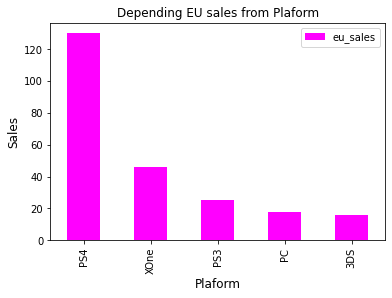

In [ ]:
more_2014.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by=['eu_sales'], ascending=False).head(5).plot(kind='bar', color='fuchsia')
plt.xlabel('Plaform', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Depending EU sales from Plaform', fontsize=12);

Топ-5 платформ в Европе: PS4, XOne, PS3, PC, 3DS

Самые популярные жанры (топ-5)

In [ ]:
more_2014.pivot_table(index='genre', values='eu_sales', aggfunc={"eu_sales": sum}).sort_values(by=['eu_sales'], ascending=False).head(5)

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


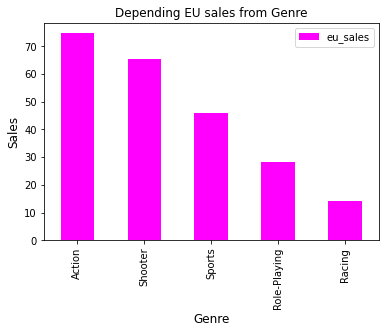

In [ ]:
more_2014.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by=['eu_sales'], ascending=False).head(5).plot(kind='bar', color='fuchsia')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Depending EU sales from Genre', fontsize=12);

Топ-5 жанров по продажам в Европе: Action, Shooter, Sports, Role-Playing, Racing

Влияние рейтинга ESRB на продажи

In [ ]:
more_2014.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by=['eu_sales'] , ascending=False).head(5)

,eu_sales
rating,
M,93.44
Unknown,58.95
E,58.06
T,34.07
E10+,26.16


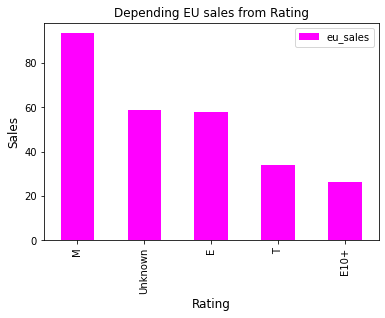

In [ ]:
more_2014.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by=['eu_sales'], ascending=False).head(5).plot(kind='bar', color='fuchsia')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Depending EU sales from Rating', fontsize=12);

Самые высокие продажи игр в Европе отмечены рейтингом «M» («Mature») — «От 17 лет»
Также как и в Северной Америке игры без рейтига занимают второе место.

### Рынок JP (Япония)

Самые популярные платформы (топ-5)

In [ ]:
more_2014.pivot_table(index='platform', values='jp_sales', aggfunc={"jp_sales": sum}).sort_values(by=['jp_sales'] , ascending=False).head(5)

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


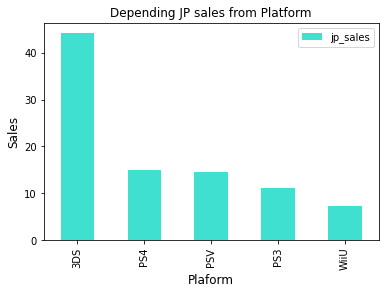

In [ ]:
more_2014.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by=['jp_sales'], ascending=False).head(5).plot(kind='bar', color='turquoise')
plt.xlabel('Plaform', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Depending JP sales from Platform', fontsize=12);

Топ-5 платформ в Японии: 3DS, PS4, PSV, PS3, PC, WiiU

Самые популярные жанры (топ-5)

In [ ]:
more_2014.pivot_table(index='genre', values='jp_sales', aggfunc={"jp_sales": sum}).sort_values(by=['jp_sales'] , ascending=False).head(5)

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


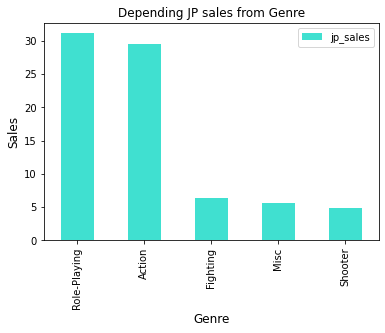

In [ ]:
more_2014.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by=['jp_sales'], ascending=False).head(5).plot(kind='bar', color='turquoise')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Depending JP sales from Genre', fontsize=12);

Топ-5 жанров по продажам в Японии: Role-Playing, Action, Fighting, Misc, Shooter

Влияние рейтинга ESRB на продажи

In [ ]:
more_2014.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by=['jp_sales'] , ascending=False).head(5)

,jp_sales
rating,
Unknown,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


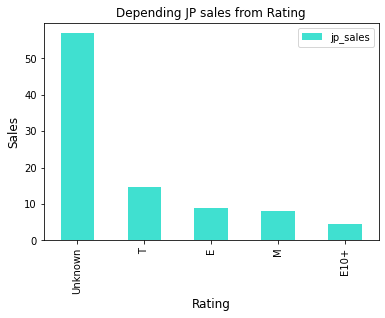

In [ ]:
more_2014.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by=['jp_sales'], ascending=False).head(5).plot(kind='bar', color='turquoise')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Depending JP sales from Rating', fontsize=12);

Большая часть продаж игр Японии в нашем сете без указания рейтинга.
Самые высокие продажи игр с рейтингом в Японии отмечены рейтингом «T» («Teen») — «Подростки 13—16 лет».

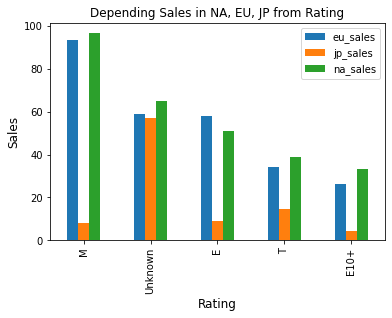

In [ ]:
more_2014.pivot_table(index='rating', values=['na_sales', 'eu_sales','jp_sales'], aggfunc='sum').sort_values(by=['na_sales', 'eu_sales','jp_sales'], ascending=False).head(5).plot(kind='bar')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Depending Sales in NA, EU, JP from Rating', fontsize=12);

Если рассматривать игры с рейтингом, то в  Японии больше продаж приходится на рейтинг "T", в то время как на рынке Северной Америки и Европы больше всех продаж приходится на рейтинг "M". Продажи игр без рейтинга лидируют в Японии, в двух других регионах такие игры занимают второе место.
Cтоит отметить, что рынок Японии в разы меньше, чем Северной Америки и Европы, но на игры без рейтинга в Японии приходится в разы больше игр, чем по отдельным рейтингам.


## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC

H₀ - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H₁ - Средние пользовательские рейтинги платформ Xbox One и PC разные

α - 5%
  

In [ ]:
from scipy import stats as st

In [ ]:
user_score_x_box_one = more_2014.query('platform=="XOne"')['user_score'].dropna()
user_score_pc = more_2014.query('platform=="PC"')['user_score'].dropna()

alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

# найду дисперсии
print('дисперсия XOne:', np.var(user_score_x_box_one))
print('дисперсия PC:', np.var(user_score_pc))

#найду средние
print('cреднее XOne: ',pd.Series(user_score_x_box_one).mean())
print('cреднее PC: ',pd.Series(user_score_pc).mean())

results = st.ttest_ind(user_score_x_box_one, user_score_pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

дисперсия XOne: 1.8795460055096425
дисперсия PC: 2.8773743617307175
cреднее XOne:  6.594545454545456
cреднее PC:  6.298360655737705
p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


In [ ]:
print('отношение дисперсий:', 2.8773743617307175/1.8795460055096425)

отношение дисперсий: 1.5308879661876178


Как правило, мы можем предположить, что совокупности имеют равные дисперсии, если отношение большей выборочной дисперсии к меньшей выборочной дисперсии составляет менее 4:1.
Отношение большей дисперсии выборки к меньшей дисперсии выборки составляет 1.5308879661876178, что меньше 4. Это означает, что мы можем предположить, что дисперсии генеральной совокупности равны.

Поскольку p-value>α , мы не можем отвергнуть нулевую гипотезу теста. У нас нет достаточных данных, чтобы сказать, что средний рейтинг между двумя платформами различен.

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

### Средние пользовательские рейтинги жанров Action  и Sports

H₀ - Средние пользовательские рейтинги жанров Action и Sports одинаковые

H₁ - Средние пользовательские рейтинги жанров Action и Sports разные

α - 5%


  

In [ ]:
user_score_action = more_2014.query('genre=="Action"')['user_score'].dropna()
user_score_sports = more_2014.query('genre=="Sports"')['user_score'].dropna()

alpha_genre = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

# найду дисперсии
print('дисперсия XOne:', np.var(user_score_action))
print('дисперсия PC:', np.var(user_score_sports))

#найду средние
print('cреднее Action: ',pd.Series(user_score_action).mean())
print('cреднее Sports: ',pd.Series(user_score_sports).mean())

results_genre = st.ttest_ind(user_score_action, user_score_sports)

print('p-значение:', results_genre.pvalue)

if results_genre.pvalue < alpha_genre:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


дисперсия XOne: 1.89208448117539
дисперсия PC: 3.4198375596751185
cреднее Action:  6.760606060606061
cреднее Sports:  5.2251968503937
p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


In [ ]:
print('отношение дисперсий:', 3.4198375596751185/1.89208448117539)

отношение дисперсий: 1.807444431630593


Отношение большей дисперсии выборки к меньшей дисперсии выборки составляет 1.807444431630593, что меньше 4. Это означает, что мы можем предположить, что дисперсии генеральной совокупности равны.

Поскольку p-value<α , мы можем отвергнуть нулевую гипотезу теста.

Средние пользовательские рейтинги жанров Action и Sports разные

## Общий вывод

### Общая информация
В сете представлены данные из открытых источников - исторические данные о продажах игр начиная с 1989 года, оценки пользователей и экспертов, жанры и платформы. Предстояло выявить определяющие успешность игры закономерности.
В сете были пропущенные значения, значения, которые редко встречаются, а также значение с которым стоило разобраться - 'tbd'.

###  Подготовка данных

Среди рейтингов был найден неявнй дубль: «K-A» («Kids to Adults»)— «Для детей и взрослых», который был заменён в 1998 году на «E» («Everyone»)

В оценке пользователей встречалось значение 'tbd', что означает "To Be Determined" ("Будет определено"), был заменен на NaN для удобства работы с данными.

Строки не содержащие название игр, жанров, годов выпуска были удалены.

Названия столбцов приведены к нижнему регистру.

Суммарные продажи во всех регионах вынесены в отдельный столбец

### Исследовательский анализ данных

Сет содержал данные с 1980 до 2016 год. Пик релизов приходится на 2006-2011 годы, далее происходит коррекция до 500-600 релизов игр в год.
Жизненнй цикл игры - около 5-10 лет. Часть игр больше не продаются. PC хоть и не показывает высоких продаж, но цикл самый долгий из тех, кто остался на рынке вплоть до 2016 года. Исходя из жизненного цикла и трендов последних лет был оставлен период 2014 по 2016 год.
У ряда платформ высокий уровень выбросов, что означает наличие игр-хитов.
Оценка пользователй не влияет на продажи, ценка критиков в очень малой степени влияет на продажи.
Лидерами среди жанров являются Shooter, Platform и Sports.


### Портрет пользователя каждого региона

Портрет пользователя в Северной Америке в большей с тепени схож с пользователем в Европе. Япония имеет больше расхождений.
Так, в Японии в топ-5 продаж игры для платформ PSV, WiiU, которые не встречаются в топ-5 в Северной Америке и Европе. В Японии жанр Role-Playing на первом месте, в то время как в Северной Америке и Европе лидеры - Shooter и Action, жанр Fighting не встречается в топ-5 в Северной Америке и Европе, а в Японии занимает 3 место.

В Японии больше продаж приходится на рейтинг "T", в то время как на рынке Северной Америки и Европы больше всех продаж приходится на рейтинг "M". На втором месте во всех регионах - игры с рейтингом "E". Стоит отметить, что рынок Японии в разы меньше, чем Северной Америки и Европы.



### Проверка гипотез

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Средние пользовательские рейтинги жанров Action и Sports разные